In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from transformers import AutoModelForCausalLM, AutoTokenizer
from scipy.interpolate import UnivariateSpline

In [2]:
MODEL_DIR = '/home/models'
MODEL_NAME = 'Meta-Llama-3-8B'
device = 'cuda:3'

model = AutoModelForCausalLM.from_pretrained(MODEL_DIR + '/' + MODEL_NAME).to(device)
tokenizer =AutoTokenizer.from_pretrained(MODEL_DIR + '/' + MODEL_NAME)

2025-02-13 01:14:37.290795: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 01:14:38.697244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-13 01:14:41.059667: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of LlamaForCausalLM were not initialized from the model checkpoint at /home/models/Meta-Llama-3-8B and are newly initialized: ['model.layers.17.self_attn.rotary_emb.inv_freq', 'model.layers.14.self_attn.rotary_emb.inv_freq', 'model.layers.5.self_attn.rotary_emb.inv_freq', 'model.layers.12.self_attn.rotary_emb.inv_freq', 'model.layers.2.self_attn.rotary_emb.inv_freq', 'model.layers.16.self_attn.rotary_emb.inv_freq', 'model.layers.26.self_attn.rotary_emb.inv_freq', 'model.layers.3.self_attn.rotary_emb.inv_freq', 'model.layers.8.self_attn.rotary_emb.inv_freq', 'model.layers.4.self_attn.rotary_emb.inv_freq', 'model.layers.21.self_attn.rotary_emb.inv_freq', 'model.layers.19.self_attn.rotary_emb.inv_freq', 'model.layers.18.self_attn.rotary_emb.inv_freq', 'model.layers.20.self_attn.rotary_emb.inv_freq', 'model.layers.13.self_attn.rotary_emb.inv_freq', 'model.layers.9.self_attn.rotary_emb.inv_freq', 'model.layers.23.self_attn.rotary_emb.inv_freq', 'model.layers.7.self_attn.rotary_

In [153]:
ROOT_DIR = '/home/prasoon/multilingual-long-reasoning'
PATH_TO_FOLDER =  ROOT_DIR + '/' + 'language_folders'

df = pd.read_csv(PATH_TO_FOLDER + '/' + 'en.csv')
indices_question_type = df.index[df['question'].str.startswith(('Who', 'Where', 'What'))].tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

0


[0.07933015935122967, 0.00369364523794502, 0.006414218572899699, 0.011162469862028956, 0.006204243982210755, 0.01741984346881509, 0.00570815138053149, 0.0037684261333197355, 0.007863447302952409, 0.006079692509956658, 0.002106265921611339, 0.0029654274694621563, 0.002763967146165669, 0.017556934151798487, 0.02383654098957777, 0.014345246250741184, 0.025979490019381046, 0.04240011144429445, 0.02859213575720787, 0.014597026165574789, 0.03701054956763983, 0.04950076248496771, 0.059117951430380344, 0.02126451744697988, 0.08520054863765836, 0.010874038911424577, 0.05608197255060077, 0.02737385267391801, 0.013114066794514656, 0.01186623505782336, 0.08012424246408045, 0.015165755874477327]
1
[0.0580418324097991, 0.003529688168782741, 0.005786047258879989, 0.012401071609929204, 0.005361687479307875, 0.012038730550557375, 0.003763700369745493, 0.004179567040409893, 0.015356860414613038, 0.009891504421830177, 0.0026319603202864528, 0.002150141110178083, 0.002460752031765878, 0.009885996405500919

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.05432802438735962, 0.0011603059247136116, 0.006839469075202942, 0.016643231734633446, 0.019012080505490303, 0.03835081681609154, 0.020292874425649643, 0.02338152937591076, 0.038480374962091446, 0.021570511162281036, 0.013260186649858952, 0.0459027960896492, 0.01853492669761181, 0.057147566229104996, 0.11256104707717896, 0.12471099197864532, 0.1113327220082283, 0.11992991715669632, 0.11810575425624847, 0.0239860899746418, 0.1184040829539299, 0.2877069413661957, 0.09403955936431885, 0.4684130549430847, 0.2712697386741638, 0.011219569481909275, 0.16571876406669617, 0.14420916140079498, 0.15798063576221466, 0.033460937440395355, 0.10909554362297058, 0.044253889471292496]
5


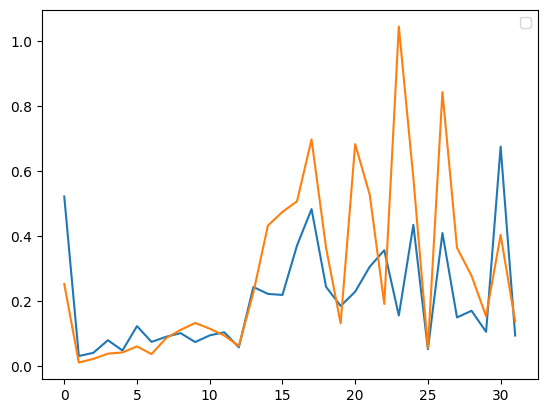

In [185]:
ROOT_DIR = '/home/prasoon/multilingual-long-reasoning'
TOP_ROW_N = 1000
PATH_TO_FOLDER =  ROOT_DIR + '/' + 'language_folders/'
prompt_template = 'Given the input context:\n{}\nAnswer the following question in one word or phrase.\n{}'
NUM_HEADS = 32
number_of_samples = 5
LOOKUP_WINDOW = 5

for file in os.listdir(PATH_TO_FOLDER):
    
    language = file.split('.')[0]
    n_success = 0
    
    df = pd.read_csv(PATH_TO_FOLDER + '/' + file)
    indices_answer_format = df.index[~df['target'].str.contains(r"[ ,]", na=False)].tolist()
    df = df[df.index.isin(list(set(indices_question_type) & set(indices_answer_format)))]
    # print(df.shape)
    LANG_WISE = np.zeros(model.config.num_hidden_layers)
    
    for index, row in df.iterrows():
        # print(n_success)
        if(n_success == number_of_samples):
            break
        current_input = row['passage'].lower()
        current_question = row['question'].lower()
        current_target = row['target'].lower()
        
        current_target_tokens = tokenizer(current_target, return_tensors='pt', add_special_tokens=False).input_ids[0].tolist()
        # print(current_target_tokens)
        input_ids = tokenizer(prompt_template.format(current_input, current_question), return_tensors='pt', add_special_tokens=False).input_ids.to(device)
        input_ids_list = tokenizer(prompt_template.format(current_input, current_question), return_tensors='pt', add_special_tokens=False).input_ids.tolist()
        
        target_input_id_indices = []
        idx = 0
        
        while(idx < len(input_ids_list[0])):
            # print(current_target, tokenizer.decode(input_ids_list[0][idx]))
            if(repr(tokenizer.decode(input_ids_list[0][idx]).strip()) == ''):
                idx += 1
                continue
            
            buffer_list = []
            buffer_string = ''
            if(current_target.startswith(tokenizer.decode(input_ids_list[0][idx]).strip())):
                while(idx < len(input_ids_list[0])):
                    if(tokenizer.decode(input_ids_list[0][idx]).strip() in current_target):
                        buffer_list.append(idx)
                        buffer_string+=tokenizer.decode(input_ids_list[0][idx])
                        idx += 1
                    else:
                        break
                try:
                    assert(current_target == buffer_string.strip())
                    target_input_id_indices.extend(buffer_list)
                    
                except:
                    idx += 1
                    continue
            idx += 1
        if(target_input_id_indices == []):
            continue
        else:
            n_success += 1
        # print(target_input_id_indices)
        # for proxy_index in target_input_id_indices:
        #     print(tokenizer.decode(input_ids_list[0][proxy_index]))
        outputs = model.generate(input_ids, max_new_tokens = 5, output_attentions=True, return_dict_in_generate=True, pad_token_id = 128001)
        LAYER_SCORES = []
        for LAYER_INDEX in range(model.config.num_hidden_layers):
            MAX_ACROSS_ATTENTION_HEADS = -1
            for HEAD_INDEX in range(NUM_HEADS):
                CURRENT = 0
                for idx in target_input_id_indices:
                    CURRENT += outputs.attentions[0][LAYER_INDEX][0][HEAD_INDEX][-1][idx].detach().cpu().item()
                MAX_ACROSS_ATTENTION_HEADS = max(CURRENT, MAX_ACROSS_ATTENTION_HEADS)
            LAYER_SCORES.append(MAX_ACROSS_ATTENTION_HEADS) 
            
        # print(LAYER_SCORES)
        LANG_WISE += np.array(LAYER_SCORES)

    plt.plot(LANG_WISE)
plt.legend()